In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 2.1 MB/s eta 0:00:00


In [2]:
import pathlib
import textwrap
import google.generativeai as genai
from google.colab import userdata
from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

Get your Gemini API key from https://makersuite.google.com/app/apikey

In [11]:
for model in genai.list_models():
  if 'generateContent' in model.supported_generation_methods:
    print(model.name)

models/gemini-pro
models/gemini-pro-vision


In [4]:
import getpass
API_KEY=getpass.getpass("Enter your API Key: ")

Enter your API Key: ··········


Text-to-Text

In [15]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))
genai.configure(api_key=API_KEY)
model = genai.GenerativeModel('gemini-pro')

In [16]:
# help(model)

In [18]:
prompt=input("Enter your prompt: ")
response = model.generate_content(prompt)
x=response.text
print('Response: ',end=' ')
to_markdown(x)

Enter your prompt: What is meant by GenAI?
Response:  

> GenAI stands for Generative Artificial Intelligence. It is a type of AI that creates new data or content from scratch, rather than just analyzing or manipulating existing data. GenAI algorithms are able to learn the underlying patterns and structures in data, and then use that knowledge to generate new data that is consistent with the original data.
> 
> There are many different types of GenAI algorithms, each with its own strengths and weaknesses. Some of the most common types of GenAI algorithms include:
> 
> * **Generative Adversarial Networks (GANs)**: GANs are a type of GenAI algorithm that uses two neural networks to compete against each other. One network, the generator, creates new data, while the other network, the discriminator, tries to distinguish between real and generated data. The generator learns to create data that is realistic enough to fool the discriminator, while the discriminator learns to identify generated data more accurately.
> * **Variational Autoencoders (VAEs)**: VAEs are a type of GenAI algorithm that uses a neural network to learn a latent representation of data. The latent representation is a compressed version of the data that captures its most important features. The VAE can then use the latent representation to generate new data that is consistent with the original data.
> * **Deep Dream Generators**: Deep Dream Generators are a type of GenAI algorithm that uses a neural network to create psychedelic images. The algorithm starts with a random image and then iteratively applies a series of filters to the image. The filters are designed to enhance the features in the image that the neural network finds interesting. The result is often a surreal and dreamlike image.
> 
> GenAI has a wide range of potential applications, including:
> 
> * **Image and video generation:** GenAI algorithms can be used to create realistic images and videos from scratch. This technology can be used for entertainment purposes, such as creating video games and movies, as well as for more practical purposes, such as medical imaging and surveillance.
> * **Music generation:** GenAI algorithms can be used to create new music that is consistent with a particular style or genre. This technology can be used to help musicians compose new songs, or to create music for video games and movies.
> * **Text generation:** GenAI algorithms can be used to generate new text, such as news articles, blog posts, and even poetry. This technology can be used to help writers overcome writer's block, or to create content for websites and social media.
> * **Drug discovery:** GenAI algorithms can be used to design new drugs that are more effective and have fewer side effects. This technology can help to accelerate the drug discovery process and bring new drugs to market more quickly.
> 
> GenAI is a rapidly developing field, and it is likely to have a major impact on many different industries in the years to come. As GenAI algorithms become more powerful, they will be able to generate more realistic and sophisticated data, which will open up new possibilities for innovation and creativity.

In [19]:
response = model.generate_content("Write python code to add two numbers")
x=response.text
to_markdown(x)

> ```python
> def add_two_numbers(a, b):
>   """Adds two numbers together and returns their sum.
> 
>   Args:
>     a: The first number.
>     b: The second number.
> 
>   Returns:
>     The sum of the two numbers.
>   """
> 
>   return a + b
> 
> 
> if __name__ == "__main__":
>   # Get two numbers from the user.
>   a = float(input("Enter the first number: "))
>   b = float(input("Enter the second number: "))
> 
>   # Add the two numbers together.
>   sum = add_two_numbers(a, b)
> 
>   # Print the sum of the two numbers.
>   print("The sum of the two numbers is:", sum)
> ```

In [20]:
response = model.generate_content(x+" convert the code into Java")
to_markdown(response.text)

> ```java
> import java.util.Scanner;
> 
> public class AddTwoNumbers {
> 
>     public static void main(String[] args) {
>         Scanner scanner = new Scanner(System.in);
> 
>         // Get two numbers from the user.
>         System.out.println("Enter the first number: ");
>         float a = scanner.nextFloat();
>         System.out.println("Enter the second number: ");
>         float b = scanner.nextFloat();
> 
>         // Add the two numbers together.
>         float sum = addTwoNumbers(a, b);
> 
>         // Print the sum of the two numbers.
>         System.out.println("The sum of the two numbers is: " + sum);
>     }
> 
>     public static float addTwoNumbers(float a, float b) {
>         // Adds two numbers together and returns their sum.
> 
>         return a + b;
>     }
> }
> ```

Image-to-Text

In [21]:
model = genai.GenerativeModel('gemini-pro-vision')

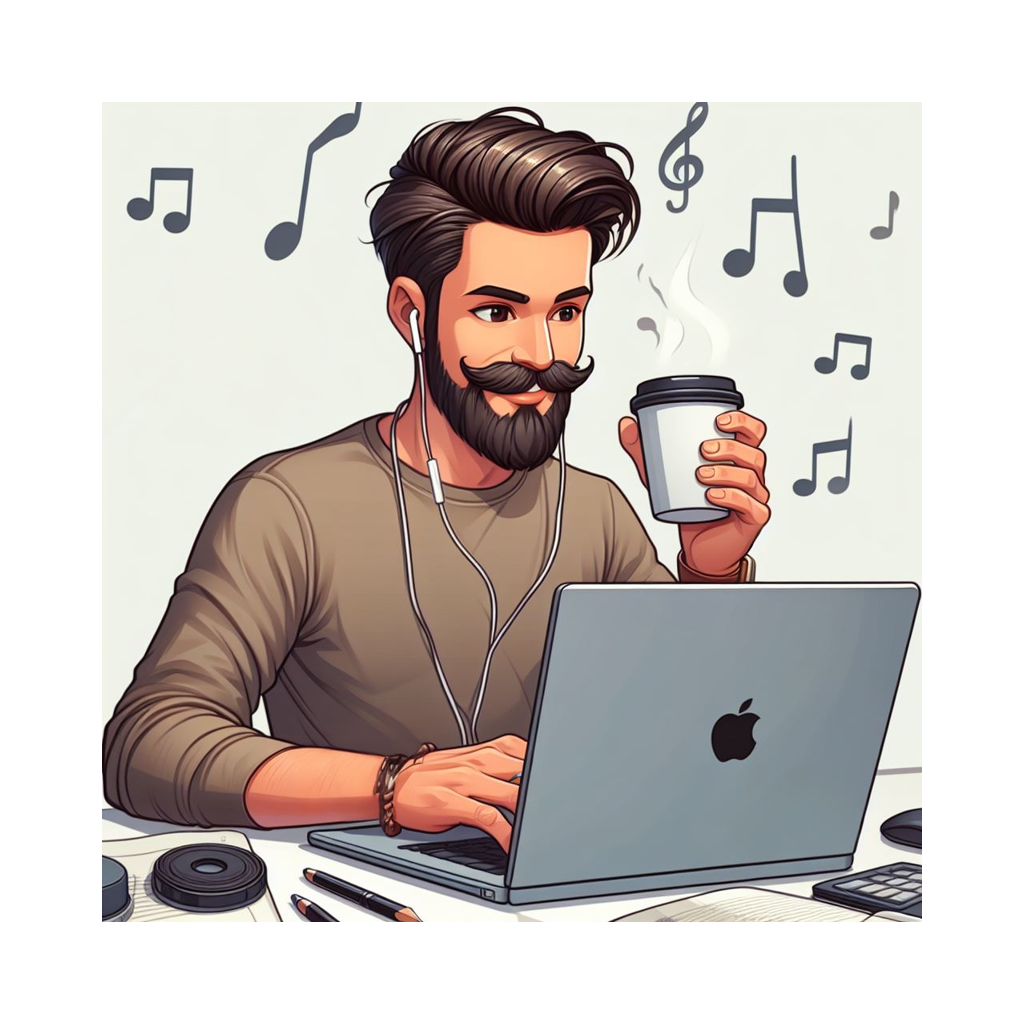

In [37]:
from PIL import Image
img=Image.open('Img1.jpg')
img

In [24]:
response = model.generate_content(img)
to_markdown(response.text)

>  A man with a beard and mustache is sitting at his desk, drinking coffee and listening to music. He is wearing headphones and there are musical notes floating around his head. He is also using a laptop.

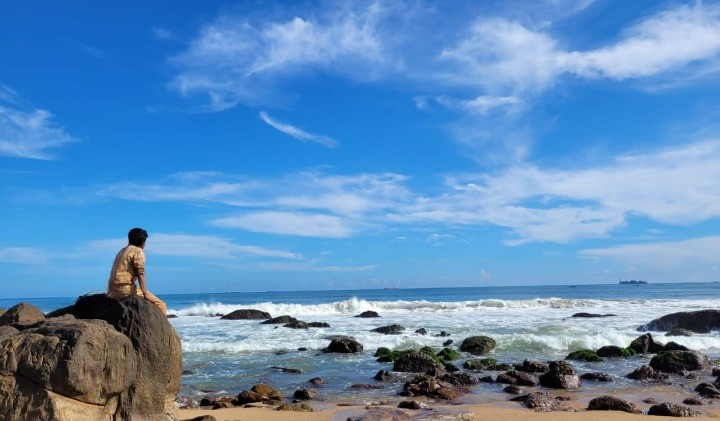

In [38]:
img1=Image.open('Img2.jpg')
img1

In [36]:
response = model.generate_content(img1)
to_markdown(response.text)

>  The photo shows a man sitting on a rock at the beach, looking out at the ocean. The sky is blue and there are some white clouds in the sky. The waves are crashing against the rocks. The photo is taken from a low angle, which makes the man look small and insignificant compared to the vastness of the ocean. The photo is peaceful and serene, and it captures the beauty of the natural world.